<center> 
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales - Roberto Calfulef - Matías Moreno </H3>
<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) Problema de Múltiples Anotaciones
</center>

# <a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente.

Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).

In [18]:
import pandas as pd
import numpy as np

In [19]:
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [20]:
df_train

,Sentiment,Text
0,0.0,"everything's serious , poetic , earnest and --..."
1,0.0,"narratively , trouble every day is a plodding ..."
2,1.0,a truly wonderful tale combined with stunning ...
3,1.0,jason patric and ray liotta make for one splen...
4,0.0,haneke keeps us at arm's length . guided more ...
...,...,...
3549,0.0,it takes a strange kind of laziness to waste t...
3550,0.0,"an easy watch , except for the annoying demean..."
3551,1.0,dog soldiers doesn't transcend genre -- it emb...
3552,0.0,it uses the pain and violence of war as backgr...


In [21]:
df_test

,Sentiment,Text
0,0.0,screenwriter dan schneider and director shawn ...
1,0.0,"home alone goes hollywood , a funny premise un..."
2,1.0,seldom has a movie so closely matched the spir...
3,0.0,"less dizzying than just dizzy , the jaunt is p..."
4,0.0,an ultra-low-budget indie debut that smacks mo...
...,...,...
3549,1.0,a fascinating documentary about the long and e...
3550,1.0,the filmmakers' eye for detail and the high st...
3551,1.0,throwing caution to the wind with an invitatio...
3552,0.0,"a big , baggy , sprawling carnival of a movie..."


In [22]:
np_labels_train = np.array(labels_train)
num_ones_train = (np_labels_train == 1).sum()
np_labels_test = np.array(labels_test)
num_ones_test = (np_labels_test == 1).sum()
print("opiniones positivas train: ", num_ones_train)
print("opiniones positivas test: ", num_ones_test)

opiniones positivas train:  1770
opiniones positivas test:  1751


In [23]:
i = 0
sumPositivo = 0
sumNegativo = 0
total = 3554
for i in range(3554):
  if labels_train[i] == 1:
    sumPositivo += len(df_train_text[i])
  else:
    sumNegativo += len(df_train_text[i])
print("Largo promedio positivo train: ", sumPositivo/1770)
print("Largo promedio negativo train: ", sumNegativo/1784)

i = 0
sumPositivo = 0
sumNegativo = 0
total = 3554
for i in range(3554):
  if labels_test[i] == 1:
    sumPositivo += len(df_test_text[i])
  else:
    sumNegativo += len(df_test_text[i])
print("Largo promedio positivo test: ", sumPositivo/1751)
print("Largo promedio negativo test: ", sumNegativo/1803)

Largo promedio positivo train:  114.6909604519774
Largo promedio negativo train:  114.72309417040358
Largo promedio positivo test:  118.83152484294689
Largo promedio negativo test:  114.17249029395452


Ambos conjuntos tienen la misma cantidad de opiniones: 3554. El conjunto train tiene 1770 opiniones clasificadas como positivas, mientras que el conjunto test tiene 1751. En el conjunto train, el largo promedio de las opiniones positivas y negativas son de 114.69 e 113.79. Mientras que para el conjunto de test son de 118.83 e 114.17

b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [24]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.2, random_state=0)

c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (lower-casing), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (stop word removal [3]), además de pasar las palabras a su tronco léxico con la técnica de lemmatizer [4]. Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/mati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
print(word_extractor("I lovve too eaaaat car cars play playing played cake"))
#print(word_extractor("I love eating cake"))
#print(word_extractor("I loved eating the cake"))
#print(word_extractor("I do not love eating cake"))
#print(word_extractor("I don't love eating cake"))
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

 lovve eaat car car play playing played cake


El vocabulario humano es muy diverso. Existen muchas formas de decir exactamente la misma intención pero con distintas palabras. El uso de bromas, sarcasmos, abreviaciones e incluso faltas de ortografía hace complejo el procesar un texto escrito. Además en internet, como es el caso a analizar, las personas escriben de manera diferente que en contextos mas formales.
En especifico, se busca normalizar las oraciones para quitar carga extra que pueda tener el calculo posterior, como transformar negaciones a palabras en positivo y eliminar las abreviaciones.  

d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado TF (term-frequency). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)

... #transform val and test
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()
dist=np.array(features_train.sum(axis=0)).reshape(-1,)

print("Largo diccionario entrenamiento: ", len(vocab))
masFrecuentesEntrenamiento = dist.argsort()[-10:][::-1]  # obtiene las 15 palabras mas utilizadas, en orden de frecuencia de mayor a menor
for indice in masFrecuentesEntrenamiento:
    print(vocab[indice],dist[indice])
print("--------------------------------------------------------------")
dist=np.array(features_test.sum(axis=0)).reshape(-1,)
masFrecuentesTest = dist.argsort()[-10:][::-1]  # obtiene las 15 palabras mas utilizadas, en orden de frecuencia de mayor a menor

for indice in masFrecuentesTest:
    print(vocab[indice],dist[indice])



Largo diccionario entrenamiento:  8541
film 468
movie 399
one 208
ha 200
like 192
make 156
story 143
character 136
even 119
time 118
--------------------------------------------------------------
film 581
movie 568
one 259
ha 246
like 239
story 204
character 178
time 176
make 167
good 142


e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica LSA (Latent Semantic Analysis) [5] que a diferencia de PCA, no centra los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

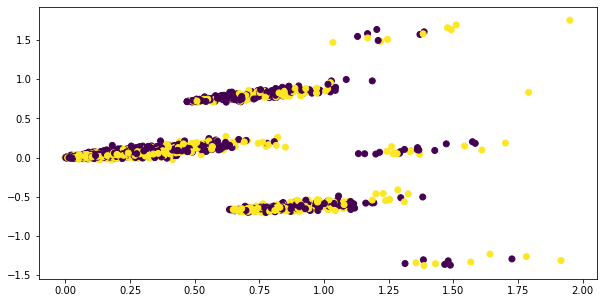

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

En el grafico se puede observar que los conceptos estan mezclados. La mayoría de las zonas (conceptos cercanos) pertenecen a ambas clases. Solo en algunas zonas prevalece una u otra categoría. Esto nos muestra que usar conceptos individualmente no es un buen predictor para clasificar correctamente una oración completa.

f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma  𝑙2 ). Varíe el parámetro de regularización  𝐶 , en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro  𝐶 . Explique el significado y valor esperado del parámetro de regularización.

/home/mati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Best accuracy test =  0.7116736990154712
Best param test =  1.0


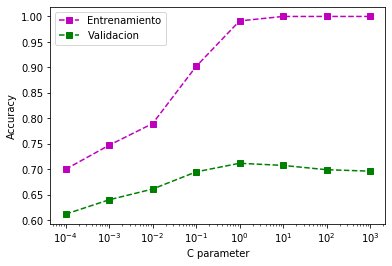

In [29]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4.0,4.0)]

y_train_acc = np.empty(len(Cs))
y_test_acc = np.empty(len(Cs))
bestAcc = 0
bestParam = 0

for i in range(len(Cs)):
    _, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= Cs[i])

    y_train_acc[i] = train_acc
    y_test_acc[i] = test_acc

    if test_acc > bestAcc:
      bestAcc = test_acc
      bestParam = Cs[i]

print("Best accuracy test = ", bestAcc)
print("Best param test = ", bestParam)
plt.plot(Cs,y_train_acc,'s--m',label ="Entrenamiento")
plt.plot(Cs,y_test_acc,'s--g',label ="Validacion")
plt.legend(loc='best')
plt.xlabel("C parameter")
plt.ylabel("Accuracy")
plt.xscale('log')

El parámetro de regularización regula la penalización de datos extremos. Se busca evitar tomar muy en cuenta datos outliers, eliminando "ruido" de la muestra, evitando imaginar patrones donde no los hay.
Se puede observar que al variar parámetro de regularización, el conjunto de entrenamiento tiene una presición cercana a 1 cuando el parámetro es mayor a 1. Y en cuanto a los datos de validación el mejor resultado es de 0.7117 usando el parámetro igual a 1.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización  𝐶  para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

Kernel:  linear
  Best accuracy test =  0.6919831223628692
  Best param test =  0.1
Kernel:  poly2
  Best accuracy test =  0.680731364275668
  Best param test =  1.0
Kernel:  poly3
  Best accuracy test =  0.6624472573839663
  Best param test =  10.0
Kernel:  poly5
  Best accuracy test =  0.5457102672292545
  Best param test =  1000.0
Kernel:  rbf
  Best accuracy test =  0.6919831223628692
  Best param test =  10.0
Kernel:  sigmoid
  Best accuracy test =  0.7018284106891702
  Best param test =  1.0


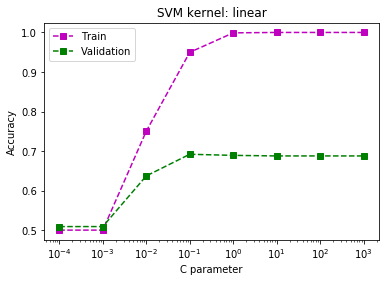

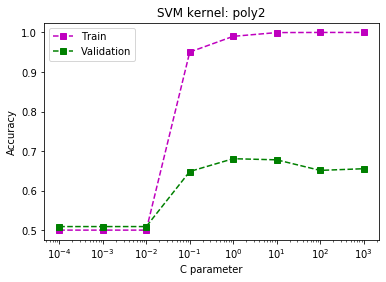

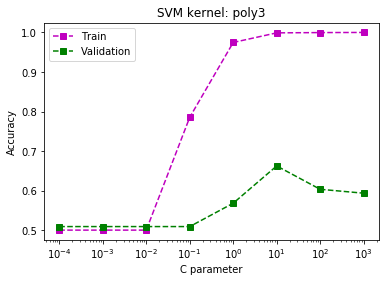

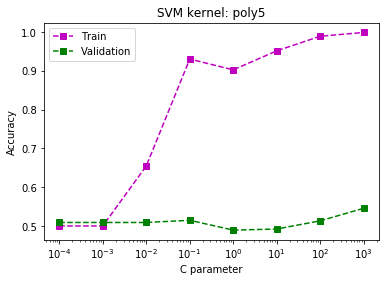

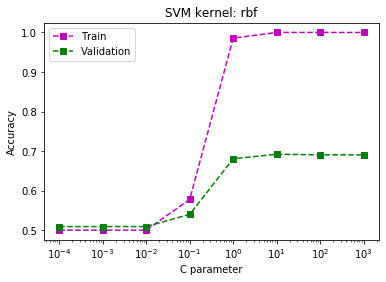

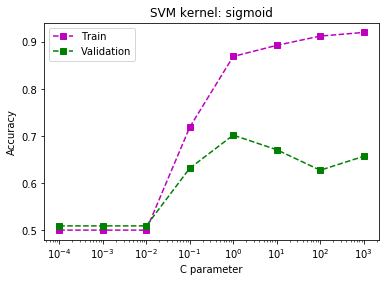

In [31]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear', d=1):
    model= SVM()
    if kernel == 'poly':
      model.set_params(C=param, kernel=kernel, degree = d)
    else:
      model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10.0**i for i in np.arange(-4,4)]

kernels = ['linear', 'poly2', 'poly3', 'poly5', 'rbf', 'sigmoid']

y_train_acc = np.empty(len(Cs))
y_test_acc = np.empty(len(Cs))

for kernel in kernels:
  bestAcc = 0
  bestParam = 0
  for i in range(len(Cs)):
    if kernel == 'poly2':
      model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, Cs[i], 'poly', 2)
    elif kernel == 'poly3':
      model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, Cs[i], 'poly', 3)
    elif kernel == 'poly5':
      model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, Cs[i], 'poly', 5)
    else:
      model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, Cs[i], kernel)
    y_train_acc[i] = train_acc
    y_test_acc[i] = test_acc
    if test_acc > bestAcc:
      bestAcc = test_acc
      bestParam = Cs[i]
  print("Kernel: ", kernel)
  print("  Best accuracy test = ", bestAcc)
  print("  Best param test = ", bestParam)

  plt.subplots()
  plt.plot(Cs, y_train_acc, 's--m', label ="Train")
  plt.plot(Cs, y_test_acc, 's--g', label ="Validation")
  plt.legend(loc='best')
  plt.xlabel("C parameter")
  plt.ylabel("Accuracy")
  title = "SVM kernel: " + kernel
  plt.title(title)
  plt.xscale('log')
   
plt.show()

Los distintos kernel redistribuyen los datos a distintas dimensionalidades con el fin de intentar separar los datos para una mejor clasificación. Todas las SVM tuvieron un rendimiento similar, la de mejor calidad fue usando un kernel sigmoid con una presición de 0.7018. 

h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos  𝑘  en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    ##print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0], 200)

y_train_acc = np.empty(len(Ks))
y_test_acc = np.empty(len(Ks))
bestAcc = 0
bestParam = 0

for i in range(len(Ks)):
  _, train_acc, test_acc = do_KNN(features_train, labels_train, features_val, labels_val, Ks[i])
  y_train_acc[i] = train_acc
  y_test_acc[i] = test_acc
  if test_acc > bestAcc:
    bestAcc = test_acc
    bestParam = Ks[i]

print("Best accuracy test = ", bestAcc)
print("Best param test = ", bestParam)
plt.plot(Ks,y_train_acc,'s--m',label ="Entrenamiento")
plt.plot(Ks,y_test_acc,'s--g',label ="Validacion")
plt.legend(loc='best')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

A priori no se puede determinar un valor de k que aumente la precisión del modelo. Se aumenta el numero de vecinos en aumentos de 200 vecinos en cada iteración de la experimentación. El mejor resultado obtenido para el conjunto de validación se obtuvo con 201 vecinos, donde la precision fue de 70% aproximadamente.

i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de max depth y min samples split de manera separada, constuyendo gráficos de error respecto a estos parámetros. Los valores que se presentan son sugerencias, no es necesario utilizar los mismos. Comente sobre la diferencia entre la selección de estos dos parámetros.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    #print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], int(features_train.shape[1]/5) ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , int(features_train.shape[0]/5) ) #choose steps

y_train_acc = np.empty(len(SamplesS))
y_test_acc = np.empty(len(SamplesS))
bestAcc = 0
bestParam = 0

for i in range(len(Depths)):
    for j in range(len(SamplesS)):
        _, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, Depths[i],SamplesS[j])
        y_train_acc[j] = train_acc
        y_test_acc[j] = test_acc
        #if test_acc > bestAcc:
           # bestAcc = test_acc
            #bestParam = Depths[i]
    plt.subplots()
    plt.plot(SamplesS,y_train_acc,'s--m',label ="Entrenamiento")
    plt.plot(SamplesS,y_test_acc,'s--g',label ="Validacion")
    plt.legend(loc='best')
    plt.xlabel("Valor de Samples")
    plt.ylabel("Accuracy")
    plt.title('Profundidad del '+str((i/len(Depths))*100)+'%')
    
plt.show()

Al aumentar el numero de samples, se observa que el rendimiento del modelo empeora, sus mejores resultados se encuentran entre 500 y 1000 samples. Por otro lado, al aumentar la profundidad, no aumenta la precisión del algoritmo, esa se mantiene alrededor del 60% en todos lo casos.

j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de keras): entrenada por 25 iteraciones al dataset (epochs) con un tamaño de batch de 128 para las actualizaciones de los pesos, utilizando SGD con una tasa de aprendizaje  0.1  sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas  𝑁ℎ  y la capa de entrada implícita para  𝑥 . Varíe el parámetro que corresponde al número de neuronas en la capa oculta  𝑁ℎ , en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]

y_train_acc = np.empty(len(N_h))
y_test_acc = np.empty(len(N_h))
bestAcc = 0
bestNeurons = 0

for i in range(len(N_h)):
    _, train_acc, test_acc = do_ANN(features_train, labels_train, features_val, labels_val, N_h[i])
    y_train_acc[i] = train_acc
    y_test_acc[i] = test_acc
    if test_acc > bestAcc:
      bestAcc = test_acc
      bestNeurons = N_h[i]

print("Best accuracy test = ", bestAcc)
print("Best Hidden Neurons = ", bestNeurons)

plt.plot(N_h,y_train_acc,'s--m',label ="Train")
plt.plot(N_h,y_test_acc,'s--g',label ="Validation")
plt.legend(loc='best')
plt.xlabel("Hidden Neurons")
plt.ylabel("Accuracy")
plt.xscale('log', basex=2)

ModuleNotFoundError: No module named 'keras'

Lo primero en notar es el tiempo que toma el metodo para entregar las soluciones. La presicion disminuye considerablemente con el excesivo aumento de neuronas, mayores a 100. Es posible que los datos sean muy pocos como para usar tantas neuronas. El mejor resultado se obtiene con 2 neuronas con una precision de 0.6438.

k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [34]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1)
print(f"Precision Training: {train_acc}")
print(f"Precision Validacion: {test_acc}")
print(f"Precision Test: {model.score(features_test, labels_test)}")

Precision Training: 0.9912064720365811
Precision Validacion: 0.7116736990154712
Precision Test: 0.7146876758581879


Con el modelo basado en regresión logístca se logra una precisión de aproximadamente 0.712 lo cual es superior a otros modelos que varian su presicion entre 0.6 y 0.7. Es un valor mucho mejor que usar el azar pero no parece tan bueno. Realmente deseabamos tener un valor sobre el 0.8 o 0.9.

l) Para comparar sus resultados utilice el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner) [6], el cual entrega una score de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [35]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

El modelo VADER arroja una presición de un 0.6359. Es una presición mayor a varios modelos presentados en los puntos anteriores y es notable que lo haga sin entrenamiento, aunque no es un modelo generico puesto que funciona especificamente para este tipo de problemas. Aunque, sigue siendo menor al modelo basado en regresión logística con unas presición de 0.7037.

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación TF genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [37]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0)
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)

popVocab = vocab
popScores = word_scores

positive = []
negative = []

for i in range(10):
  positive.append(vocab[np.argmax(popScores, axis = 0)[1]])
  negative.append(vocab[np.argmax(popScores, axis = 0)[0]])
  popScores[np.argmax(popScores, axis = 0)[1]] = 0.5
  popScores[np.argmax(popScores, axis = 0)[0]] = 0.5

print(positive)
print(negative)

['world', 'solid', 'heart', 'rare', 'moving', 'still', 'enjoyable', 'ride', 'witty', 'fun']
['cliche', 'worst', 'dull', 'bad', 'boring', 'feel', 'nearly', 'silly', 'heavy', 'tv']


Entre las 10 palabras mas positivas se encuentran solid, enjoyable, fun, heart que son palabras claramente utiles para describir algo satisfactorio. Tambien se encuentran still y ride, que no parecen tener una predisposición tan "positiva", tal vez es por que se usan mucho en oraciones para describir films agradables. En la otra orilla tenemos boring, dull, silly, worst, que son palabras comunes para describir cosas aburridas o poco interesantes. En el top 10 de palabras negativas tambien aparece tv and feel que no parecen palabras comunes para describir cosas negativas.

n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de stemmming [7] en lugar de lemmatization para llevar a su tronco léxico.

In [38]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    return wordlemmatizer.lemmatize(porter.stem(word))
    
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'[1-9]','',text)
    text = re.sub(r'[!@#$%^&*(),.?":{}|<>]','',text)
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    commonwords = stopwords.words('spanish')
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    
    return words
# ... #try yourself
# print(word_extractor("I lov2135e t1 7 78 177171o eat car car play playing played cake"))
# print(word_extractor("I love e! * ating cake"))
# print(word_extractor("I  es  si tal loved eating the cake"))
# print(word_extractor("I do not love eating cake"))
# print(word_extractor("I don't love eating cake"))

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1)
print(f"Precision Training: {train_acc}")
print(f"Precision Validacion: {test_acc}")
print(f"Precision Test: {model.score(features_test, labels_test)}")

Precision Training: 0.9989447766443897
Precision Validacion: 0.7271448663853727
Precision Test: 0.7366347777152504


Se eliminan los dígitos y símbolos especiales, pero no se logra ninguna mejora apreciable. Posteriormente, se experimenta eliminando las palabras comunes del idioma español y con esto se logra mejorar la solución en un 1%, lo cual es muy bueno. 
Se aplica la técnica de lemmatizer luego de haber aplicado la técnica de stemmming y se vuelve a mejorar el algoritmo en 1%. 

Se logra mejorar finalmente el algoritmo en un 2% aproximadamente, utilizando un modelo de regresión logístico. 

o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las  𝐾  palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar n-gramas, entre otras.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
features_train = tfidf_model.transform(texts_train)
features_val = tfidf_model.transform(texts_val)
features_test = tfidf_model.transform(texts_test)

model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1)
print(f"Precision Training: {train_acc}")
print(f"Precision Validacion: {test_acc}")
print(f"Precision Test: {model.score(features_test, labels_test)}")

Precision Training: 0.9338726697150896
Precision Validacion: 0.7130801687763713
Precision Test: 0.7509848058525604


Se logra mejorar la precisión en un 1.4% modificando la representación, de esta forma se tiene una precisión del 75% aproximadamente.

p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [40]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.76      0.75      0.75      1803
           +       0.75      0.75      0.75      1751

    accuracy                           0.75      3554
   macro avg       0.75      0.75      0.75      3554
weighted avg       0.75      0.75      0.75      3554



El modelo muestra una precisión del 75% para detectar textos positivos y una precisión del 76% para los textos negativos. Esto indica que el modelo clasifica de igual forma los textos.

q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En sklearn ésto puede ser realizado con el parámetro de class_weights. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [41]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.56      0.99      0.71      1803
           +       0.94      0.19      0.31      1751

    accuracy                           0.59      3554
   macro avg       0.75      0.59      0.51      3554
weighted avg       0.75      0.59      0.51      3554



Se observa que en cuanto a los casos negativos, el modelo tiene a clasificarlos mucho mejor. Le da una mayor importancia a estos. Pero para los casos positivos empeora significativamente su precisión.

r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [42]:
classes_weights = {0: 1, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)

test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=5)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.61115554 0.38884446]
Raw text:  if you saw it on tv , you'd probably turn it off , convinced that you had already seen that movie .

True sent:  0.0 -- Pred sent:  [0.60527353 0.39472647]
Raw text:  the mushy finale turns john q into a movie-of-the-week tearjerker .

True sent:  1.0 -- Pred sent:  [0.63188344 0.36811656]
Raw text:  what the movie lacks in action it more than makes up for in drama , suspense , revenge , and romance .

True sent:  0.0 -- Pred sent:  [0.58374991 0.41625009]
Raw text:  simply doesn't have sufficient heft to justify its two-hour running time .

True sent:  1.0 -- Pred sent:  [0.40585077 0.59414923]
Raw text:  though the story . . . is hackneyed , the characters have a freshness and modesty that transcends their predicament .



In [43]:
test_pred = model.predict(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=5)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  0.0
Raw text:  a puzzling experience .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  one of the most depressing movie-going experiences i can think of is to sit through about 90 minutes of a so-called 'comedy' and not laugh once .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  apparently writer-director attal thought he need only cast himself and his movie-star wife sitting around in their drawers to justify a film .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  gran historia sobre el amor , la familia , la lealtad y la traición que seguramente se convertirá en un nuevo clásico del género .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  a soulless jumble of ineptly assembled cliches and pabulum that plays like a 95-minute commercial for nba properties .



La información entregada en numeros discretos otorga mas presición. Se puede obdservar que en algunos casos el modelo esta muy seguro de una clasificación en particular, pero en otro apenas pasa el 50% de "seguridad" y los clasifica en una u otra categoría. Para ciera implementación se podrían clasificar solo las entradas en los cuales el modelo este mas seguro, como por ejemplo sobre el 60%. Así tendría una mayor presición, y dejar los comentarios bajo ese umbral como "neutrales", no positivos ni negativos.

s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Se observa que todo apoya a mejorar la presicion de los modelos. La selección de parametros es importante, puede mejorar la presición desde un 55% a un 70%. Luego la representación, y el pre procesamiento de los datos tambien afecta. Se pudo observar una mejora del 3% se precición solo modificando los datos de entrada. Finalmente la elección del modelo también es importante. Existiendo diferencias entre distintos modelos de hasta un 10% de presición en sus mejores resultados.

<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona



In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv("mturk_answers.csv") 
df

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos
...,...,...,...,...,...,...
27741,A4F3BK6J0PCVH,7144,the movie fails to live up to the sum of its p...,movi fail live sum part,neg,neg
27742,A4F3BK6J0PCVH,8293,the balkans provide the obstacle course for th...,balkan provid obstacl cours love good woman,neg,neg
27743,A4F3BK6J0PCVH,2929,this is a smart movie that knows its classical...,smart movi know classic music know freud know ...,pos,pos
27744,A4F3BK6J0PCVH,6902,"there's something with potential here , but th...",there someth potenti movi decid lavinia conser...,neg,neg


Se carga el archivo en un dataFrame de Pandas para comprender con lo que se trabajará.

In [45]:
import random
df1 = df[['Input.id','Input.original_sentence','Input.true_sent','Answer.sent']]

def transform(respuesta):
    if respuesta == 'pos':
        return 1
    else:
        return -1

DiccIDs = {}
for index, row in df.iterrows():
    if row['Input.id'] not in DiccIDs:
        DiccIDs[row['Input.id']] = transform(row['Answer.sent'])
    else:
        DiccIDs[row['Input.id']] = DiccIDs[row['Input.id']] + transform(row['Answer.sent'])

for k,v in DiccIDs.items():
    if v > 0:
        DiccIDs[k] = 1
    elif v < 0:
        DiccIDs[k] = 0
    else:
        DiccIDs[k] = random.randrange(2)
    
df1 = df1.drop_duplicates()

for index, row in df1.iterrows():
    df1.at[index,'Answer.sent']= DiccIDs[row['Input.id']]

for index, row in df1.iterrows():
    df1.at[index,'Answer.sent']= DiccIDs[row['Input.id']]
    if row['Input.true_sent'] == 'pos':
        df1.at[index,'Input.true_sent'] = 1
    else:
        df1.at[index,'Input.true_sent'] = 0

df1.rename(columns={"Input.id": "id", "Input.original_sentence": "Text",'Answer.sent':'Personas','Input.true_sent':'Real'},inplace=True)

df1['Personas'] = (pd.to_numeric(df1['Personas']))
df1['Real'] = (pd.to_numeric(df1['Real']))

df_train_text = df1.Text
df_test_text = df1.Text
labels_train = df1.Personas.values
labels_test = df1.Real.values


Se toman los comentarios de las peliculas, para utilizar las opiniones que dan las personas, se utilizaran todas las evaluaciones que da cada una por separado y se escoge la opción que sea mas votada. Por ejemplo, si 5 personas opinan que el comentario es positivo y 2 personas opinan que el comentario es negativo, se dirá que el comentario es positivo. 

In [46]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.2, random_state=0)

Se crea el conjunto de train y de validacion, donde el conjunto de train tiene el 80% de los datos y el de validacion un 20%

In [47]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    return wordlemmatizer.lemmatize(porter.stem(word))
    
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    text = re.sub(r'[1-9]','',text)
    text = re.sub(r'[!@#$%^&*(),.?":{}|<>]','',text)
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    commonwords = stopwords.words('spanish')
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    
    return words

texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

Se pre-procesan los datos, utilizando el método que dio mejores resultados en la parte 1 de la tarea.

In [48]:
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)

Se vectorizan los datos utilizando CountVectorizer, el cual cuenta las veces que aparece una palabra.

Best accuracy test =  0.8889574336829118
Best param test =  100.0


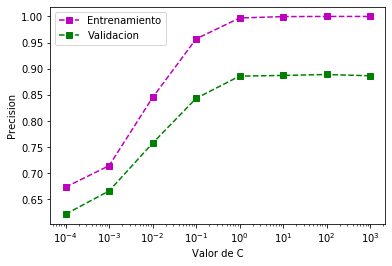

In [49]:
def do_LOGIT(x,y,xv,yv, param):
    model= LogisticRegression(max_iter=10000)
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4.0,4.0)]

y_train_acc = np.empty(len(Cs))
y_test_acc = np.empty(len(Cs))
bestAcc = 0
bestParam = 0

for i in range(len(Cs)):
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= Cs[i])
    y_train_acc[i] = train_acc
    y_test_acc[i] = test_acc
    
    if test_acc > bestAcc:
        bestAcc = test_acc
        bestParam = Cs[i]
    
    

print("Best accuracy test = ", bestAcc)
print("Best param test = ", bestParam)
plt.plot(Cs,y_train_acc,'s--m',label ="Entrenamiento")
plt.plot(Cs,y_test_acc,'s--g',label ="Validacion")
plt.legend(loc='best')
plt.xlabel("Valor de C")
plt.ylabel("Precision")
plt.xscale('log')

Se experimenta igual como se hizo en la parte 1 de esta tarea, con el fin de contrar el mejor parametro que maximice la precision en el conjunto de validacion. Se llega al resultado de que el mejor valor del parametro C es 100, el cual obtiene una precision del 88.5% para el conjunto de validación.

In [50]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 100)
prediccion = model.predict(features_test)
print('Accurracy Score = ', accuracy_score(labels_test,prediccion))

Accurracy Score =  0.8526835286859963


Finalmente se entrena el modelo utilizando el parametro C = 100 y se obtiene una precisión del 84.6% para el ground truth, lo cual es bastante bueno porque nos permite estimar un valor que podría dar persona experta.

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.